<a href="https://colab.research.google.com/github/mattbobea/Data_Science/blob/main/Chapter_01_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt
from skimage import io
from google.colab.patches import cv2_imshow

### 01 Create a white image in Python

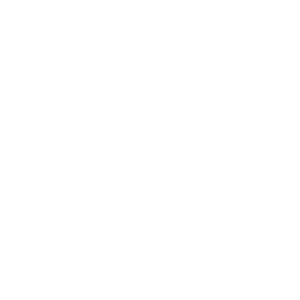

In [ ]:
img = np.zeros([300,300,3],dtype=np.uint8)
img.fill(255) 
cv2_imshow(img)

In [ ]:
img_example = np.zeros([30,30,3],dtype=np.uint8) 

#specify the orange area
img_example[:,:,0:3]=(0,125,255)

# specify the black line
img_example[1:20,1,0:3]=(0,0,0)
img_example
cv2_imshow(img_example)

In [ ]:
img_example = np.zeros([3,3,3],dtype=np.uint8) 
img_example[:,:,0:3]=(0,125,255)
img_example[1:2,1:2,0:3]=(255,255,255)
cv2_imshow(img_example)

### 02 Create yellow image

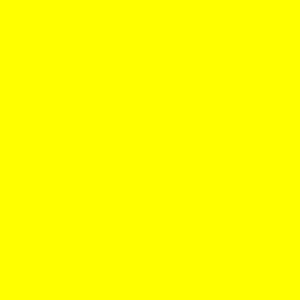

In [ ]:
img_purple = np.zeros([300,300,3],dtype=np.uint8)

img_purple[:,:,1:3] = (255, 255)
img_purple
cv2_imshow(img_purple)

### 03 Create a yellow block inside of white image

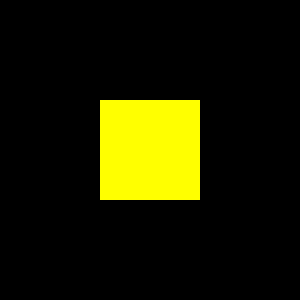

In [ ]:
img_yellow_block = np.zeros([300,300,3],dtype=np.uint8)
img_yellow_block[100:200,100:200,1:3]=(255, 255)
cv2_imshow(img_yellow_block)

### 04 Load Data Set

In [ ]:
import torchvision.datasets as dset

In [ ]:
root = './'

voc_train = dset.VOCSegmentation(root, download=True, image_set='train')

  0%|          | 0/1999639040 [00:00<?, ?it/s]

Extracting ./VOCtrainval_11-May-2012.tar to ./


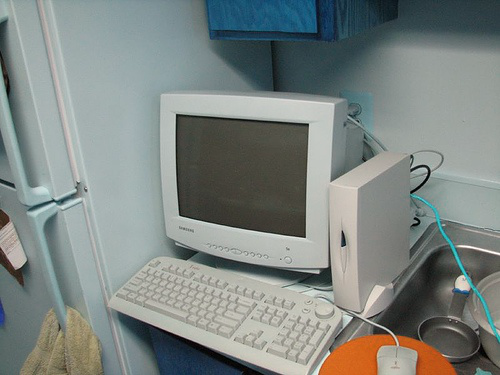

In [ ]:
index = 1

voc_image, voc_annotation = voc_train[index][0], voc_train[index][1]

cv2_imshow(np.array(voc_image))

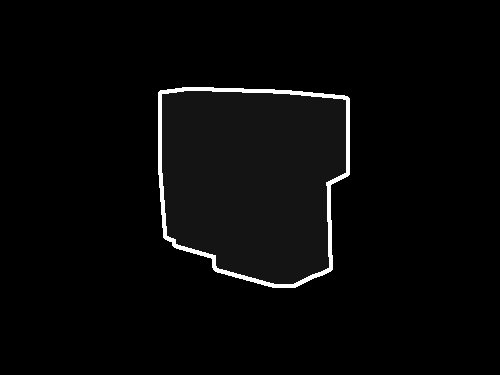

In [ ]:
cv2_imshow(np.array(voc_annotation))

### 05 Load an image

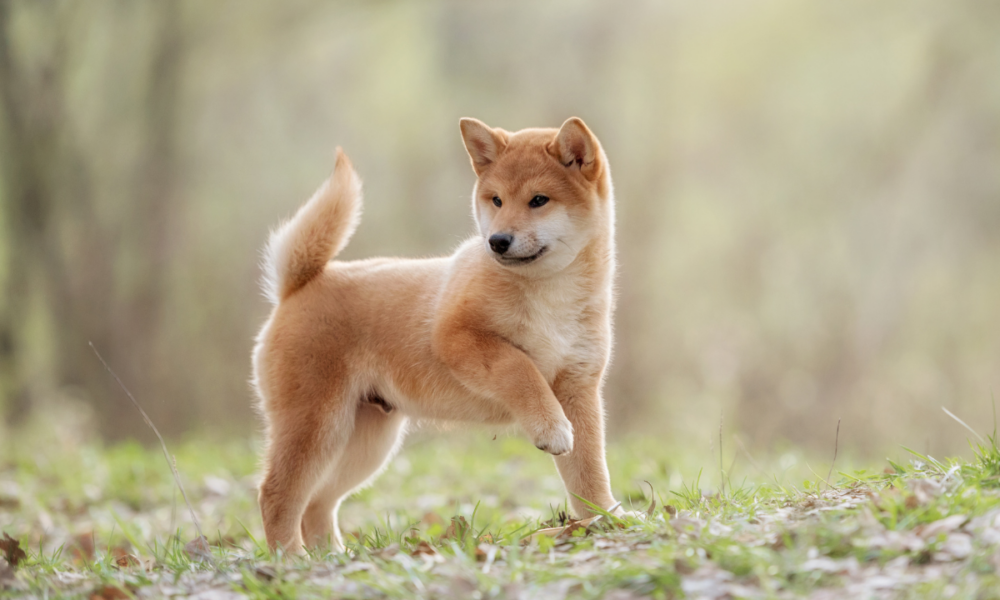

In [ ]:
image_cmyk = io.imread('https://www.newsbtc.com/wp-content/uploads/2022/08/SIB.png') 
image_rgb = cv2.cvtColor(image_cmyk, cv2.COLOR_BGR2RGB)
cv2_imshow(image_rgb)

In [ ]:
image_cmyk

array([[[104, 101,  82, 255],
        [106, 103,  84, 255],
        [108, 105,  86, 255],
        ...,
        [174, 169, 140, 255],
        [174, 169, 140, 255],
        [173, 168, 139, 255]],

       [[105, 102,  83, 255],
        [106, 103,  84, 255],
        [108, 105,  86, 255],
        ...,
        [173, 168, 139, 255],
        [173, 168, 139, 255],
        [173, 168, 139, 255]],

       [[104, 102,  82, 255],
        [106, 104,  84, 255],
        [109, 107,  87, 255],
        ...,
        [173, 168, 139, 255],
        [173, 168, 139, 255],
        [173, 168, 139, 255]],

       ...,

       [[138, 139,  99, 255],
        [147, 149, 110, 255],
        [155, 156, 121, 255],
        ...,
        [160, 161, 115, 255],
        [163, 164, 118, 255],
        [167, 168, 121, 255]],

       [[139, 138, 104, 255],
        [150, 149, 117, 255],
        [156, 156, 124, 255],
        ...,
        [154, 155, 107, 255],
        [156, 158, 110, 255],
        [160, 162, 112, 255]],

       [[136

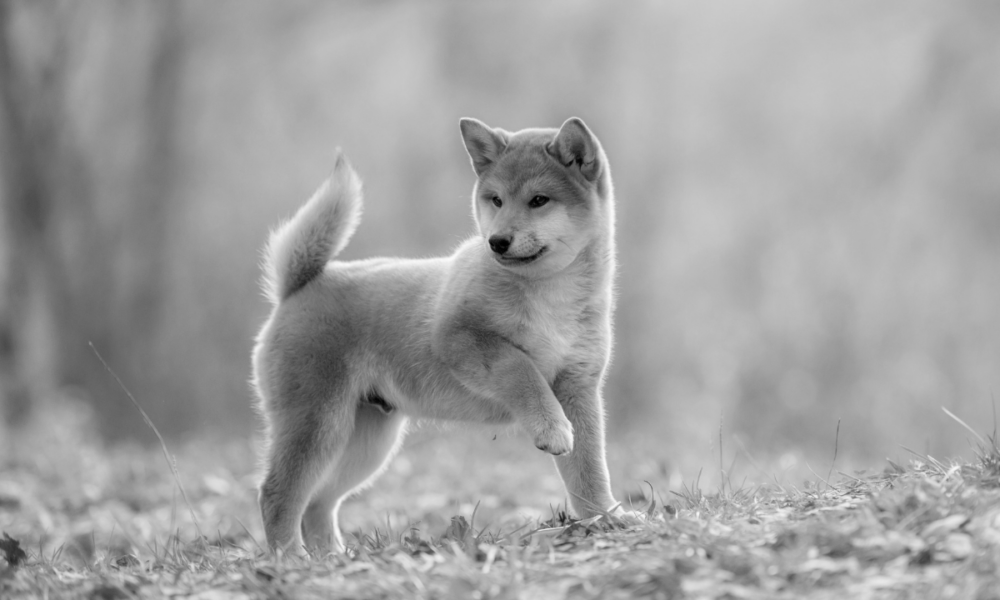

In [ ]:
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
cv2_imshow(image_gray)

In [ ]:
image_gray < 100

array([[ True,  True, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

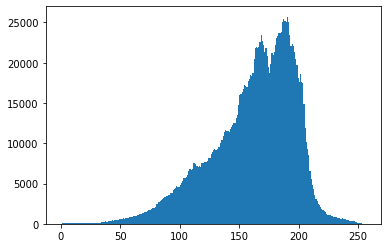

In [ ]:
plt.hist(image_rgb.ravel(),bins = 256, range = [0,256]) 
plt.show()

### 06 - Image Segmentation using K-Means Clustering

In [ ]:
image_rgb = cv2.cvtColor(image_cmyk, cv2.COLOR_BGR2RGB)

vectorized = image_rgb.reshape((-1,3))
vectorized = np.float32(vectorized)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [ ]:
K = 10
attempts=10

ret, label, center = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS) 
center = np.uint8(center)

In [ ]:
res = center[label.flatten()]
result_image = res.reshape((image_rgb.shape))

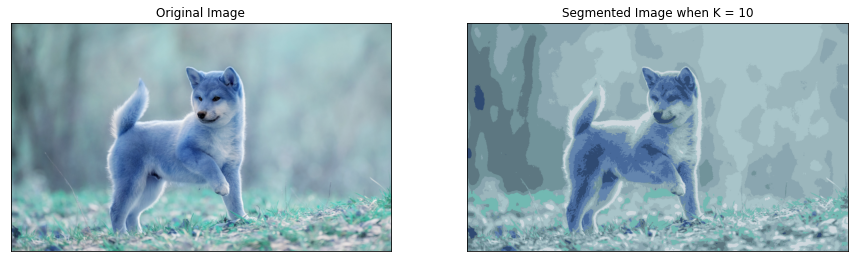

In [ ]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

### 07 - Image Segmentation using Threshold

In [ ]:
from skimage.filters import threshold_otsu

threshold = 150

In [ ]:

def filter_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])

image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
image_mask  = image_gray < threshold
result_image = filter_image(image_rgb, image_mask)

In [ ]:
image_mask

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True, False, False],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

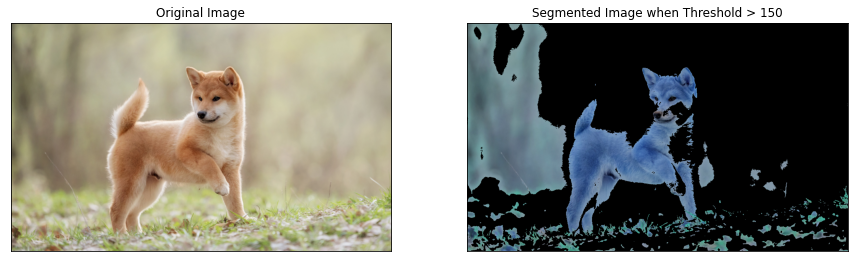

In [ ]:
figure_size = 15

plt.figure(figsize=(figure_size, figure_size))
plt.subplot(1,2,1),

## When you convert the image from BGR to RGB, then you will need to convert it back to BGR for the visualization
plt.imshow(cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when Threshold > %i' % threshold), plt.xticks([]), plt.yticks([])

plt.show()

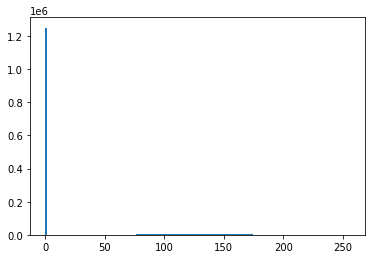

In [ ]:
plt.hist(result_image.ravel(),bins = 256, range = [0,256]) 
plt.show()

### 08 IoU

In [ ]:
# create a white image

img = np.zeros([200,200,3],dtype=np.uint8)
img.fill(255) 

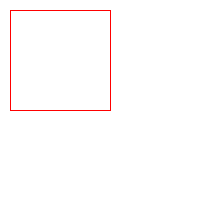

In [ ]:
# create first rectangle box
bbox_1 = [10, 10, 100, 100]

left_up = (bbox_1[0], bbox_1[1])
right_down =  (bbox_1[0] + bbox_1[2], bbox_1[1] + bbox_1[3])

thickness = 1

img_p = cv2.rectangle(img, left_up, right_down, (0, 0, 255), thickness) 

cv2_imshow(img_p)

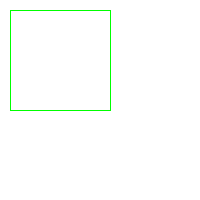

In [ ]:
# create first rectangle box
bbox_2 = [10, 10, 100, 100]

left_up = (bbox_2[0], bbox_2[1])
right_down =  (bbox_2[0] + bbox_2[2], bbox_2[1] + bbox_2[3])

thickness = 1

img_g = cv2.rectangle(img_p, left_up, right_down, (0, 255, 0), thickness) 

cv2_imshow(img_g)

In [ ]:
# calculate union

union_x = max(bbox_1[0], bbox_2[0]) #60
union_y = max(bbox_1[1], bbox_2[1]) #60

union_w = min(bbox_1[0]+bbox_1[2], bbox_2[0]+bbox_2[2]) - union_x #110-60
union_w = max(union_w, 0)

union_h = min(bbox_1[1]+bbox_1[3], bbox_2[1]+bbox_2[3]) - union_y #110-60
union_h = max(union_w, 0)

union_area = union_w * union_h #2500
union_area

10000

In [ ]:
# calculate intersection

box_1_area = bbox_1[2] * bbox_1[3]
box_2_area = bbox_2[2] * bbox_2[3]

intersection_area = box_1_area + box_2_area - union_area
intersection_area

10000

In [ ]:
iou = union_area / intersection_area

iou

1.0

### VOC Full Example by using Threadhold

In [ ]:
threshold = 150

voc_image_gray = cv2.cvtColor(np.array(voc_image), cv2.COLOR_RGB2GRAY)

thresh, predicted_image = cv2.threshold(voc_image_gray, threshold, 255, cv2.THRESH_BINARY)

ground_truth_image = np.array(voc_annotation)

In [ ]:
intersection = np.logical_and(predicted_image, ground_truth_image)
union = np.logical_or(predicted_image, ground_truth_image)
iou_score = np.sum(intersection) / np.sum(union)

iou_score

0.12891669983615814

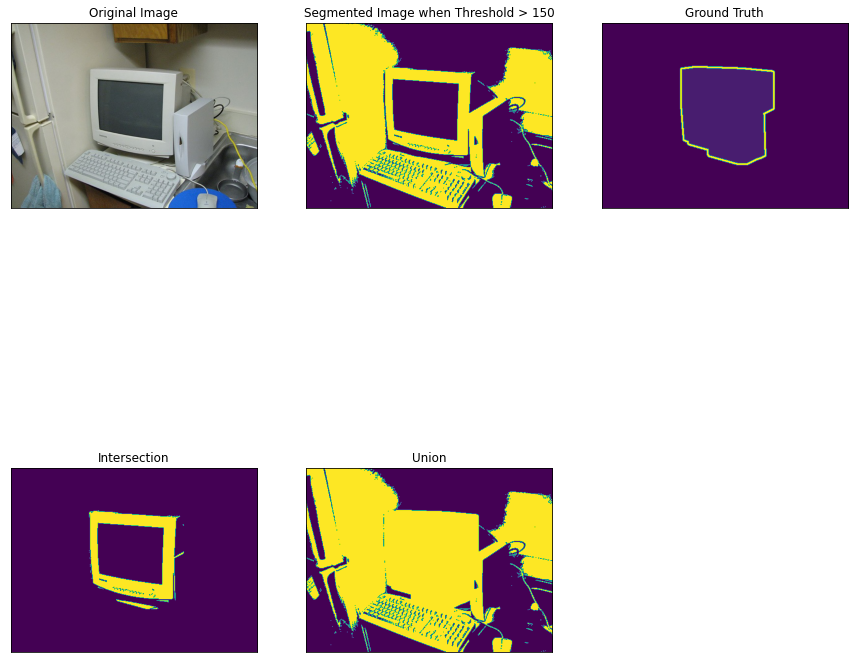

In [ ]:
figure_size = 15

plt.figure(figsize=(figure_size, figure_size))
plt.subplot(2,3,1),plt.imshow(np.array(voc_image))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(2,3,2),
plt.imshow(predicted_image)
plt.title('Segmented Image when Threshold > %i' % threshold), plt.xticks([]), plt.yticks([])

plt.subplot(2,3,3),
plt.imshow(ground_truth_image)
plt.title('Ground Truth'), plt.xticks([]), plt.yticks([])

plt.subplot(2,3,4),
plt.imshow(intersection)
plt.title('Intersection'), plt.xticks([]), plt.yticks([])

plt.subplot(2,3,5),
plt.imshow(union)
plt.title('Union'), plt.xticks([]), plt.yticks([])

plt.show()